In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder


In [23]:
df=pd.read_csv("EasyVisa.csv")
df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [24]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [26]:
# importing date class from datetime module
from datetime import date

# creating the date object of today's date
todays_date = date.today()
current_year= todays_date.year

In [27]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [28]:
[f"{column} unique values:  {df[column].nunique()}" for column in df.columns]

['case_id unique values:  25480',
 'continent unique values:  6',
 'education_of_employee unique values:  4',
 'has_job_experience unique values:  2',
 'requires_job_training unique values:  2',
 'no_of_employees unique values:  7105',
 'yr_of_estab unique values:  199',
 'region_of_employment unique values:  5',
 'prevailing_wage unique values:  25454',
 'unit_of_wage unique values:  4',
 'full_time_position unique values:  2',
 'case_status unique values:  2']

In [29]:
# importing date class from datetime module
from datetime import date

# creating the date object of today's date
todays_date = date.today()
current_year= todays_date.year

In [30]:
df['company_age'] = current_year-df['yr_of_estab']
df.drop('yr_of_estab', inplace=True, axis=1)

In [31]:
le=LabelEncoder()
df['full_time_position']=le.fit_transform(df['full_time_position'])
df['case_status']=le.fit_transform(df['case_status'])
df['has_job_experience']=le.fit_transform(df['has_job_experience'])
df['requires_job_training']=le.fit_transform(df['requires_job_training'])
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,EZYV01,Asia,High School,0,0,14513,West,592.2029,Hour,1,1,18
1,EZYV02,Asia,Master's,1,0,2412,Northeast,83425.6500,Year,1,0,23
2,EZYV03,Asia,Bachelor's,0,1,44444,West,122996.8600,Year,1,1,17
3,EZYV04,Asia,Bachelor's,0,0,98,West,83434.0300,Year,1,1,128
4,EZYV05,Africa,Master's,1,0,1082,South,149907.3900,Year,1,0,20


<Axes: xlabel='case_status', ylabel='full_time_position'>

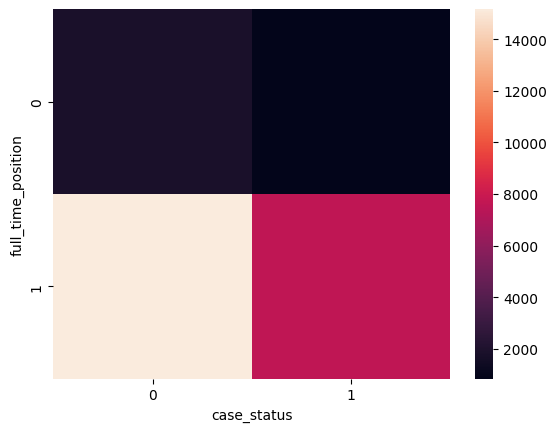

In [32]:
sns.heatmap(pd.crosstab(df['full_time_position'],df['case_status'])) 
# issey hume ye pata chla k jo log full time positin k liye apply kar rhe hai unke maximum chance hai accept hone ke

In [33]:
#Here we check that data is imbalanced or not it means we are checking that the output columns have very fluctuating 
#values or not because if the data is train on a labelleb in which one response occuring lot of times and another one is occuring few times so this cause unwanted result or bad accuracy 
df['case_status'].value_counts()

case_status
0    17018
1     8462
Name: count, dtype: int64

In [34]:
# Check the percentage of each class
print(df['case_status'].value_counts(normalize=True) * 100)

case_status
0    66.789639
1    33.210361
Name: proportion, dtype: float64


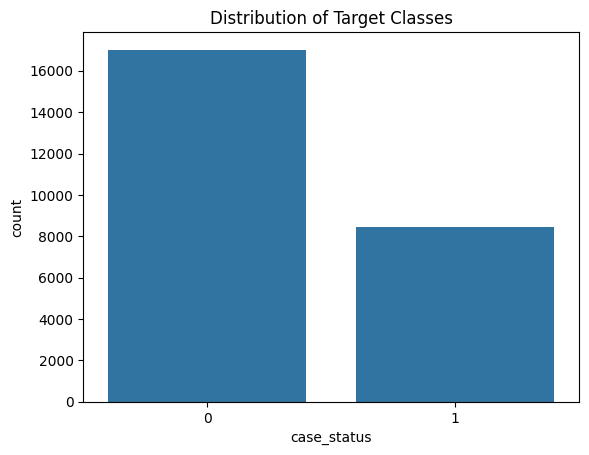

In [35]:
# Create a count plot using seaborn
sns.countplot(x='case_status', data=df)
plt.title('Distribution of Target Classes')
plt.show()

Har continent se aayi applications ki ginti:
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64


C:\Users\anura\AppData\Local\Temp\ipykernel_3240\563437623.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=continent_counts.index, y=continent_counts.values, palette='viridis')


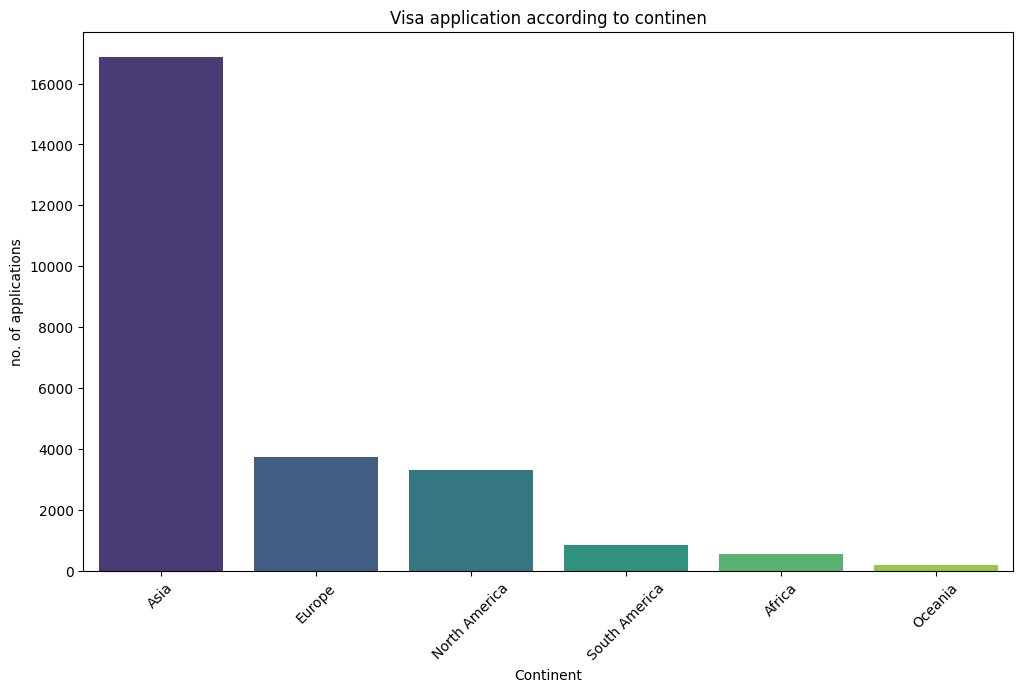

In [36]:

df = pd.read_csv('EasyVisa.csv')

# Har continent se kitni applications hain, woh count karna
continent_counts = df['continent'].value_counts()
print("Har continent se aayi applications ki ginti:")
print(continent_counts)

# Bar Chart
plt.figure(figsize=(12, 7))
sns.barplot(x=continent_counts.index, y=continent_counts.values, palette='viridis')
plt.xlabel('Continent')
plt.ylabel('no. of applications')
plt.title('Visa application according to continen')
plt.xticks(rotation=45)
plt.show()


Continent ke hisab se Visa Status (Certified vs Denied):
case_status    Certified  Denied
continent                       
Africa               397     154
Asia               11012    5849
Europe              2957     775
North America       2037    1255
Oceania              122      70
South America        493     359


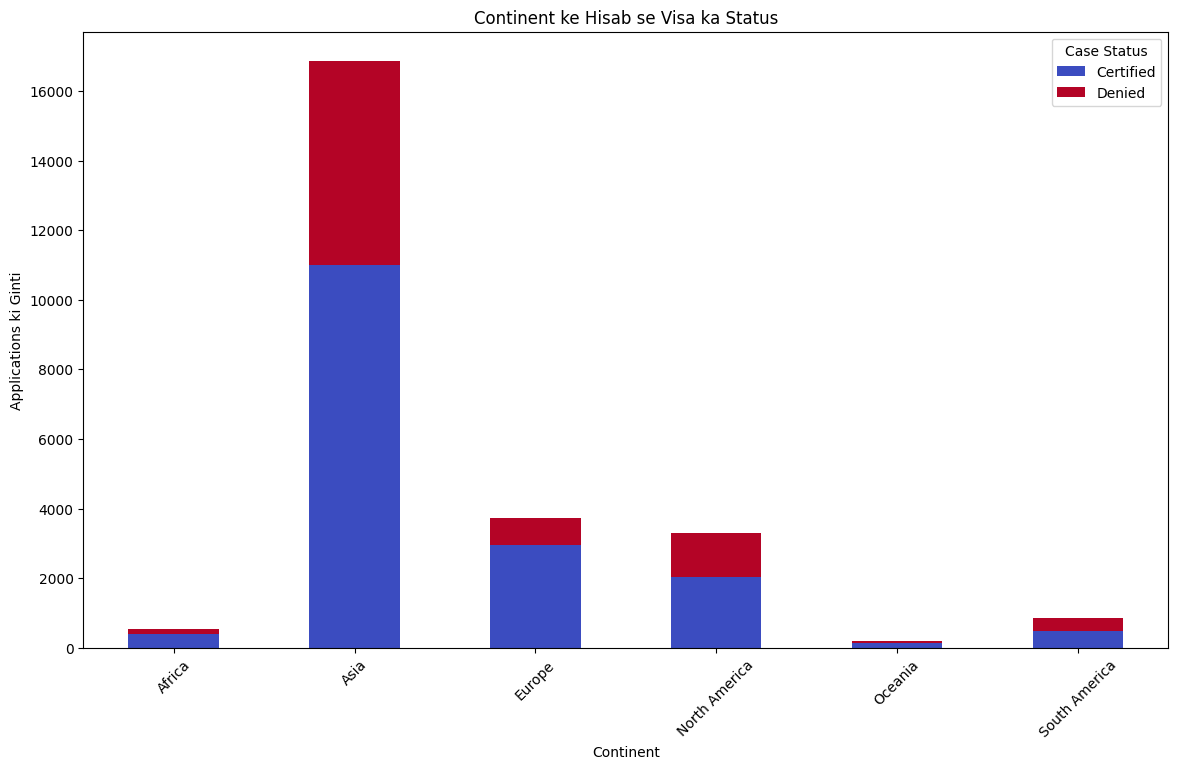

In [37]:
# Continent aur case_status ke beech kya relation hai, woh dekhna
continent_status_counts = df.groupby('continent')['case_status'].value_counts().unstack().fillna(0)

print("\nContinent ke hisab se Visa Status (Certified vs Denied):")
print(continent_status_counts)


# Iska ek stacked bar chart banana
continent_status_counts.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='coolwarm')
plt.xlabel('Continent')
plt.ylabel('Applications ki Ginti')
plt.title('Continent ke Hisab se Visa ka Status')
plt.xticks(rotation=45)
plt.legend(title='Case Status')
plt.show()

In [38]:
# Education ke hisaab se success rate nikalna
df[df['continent'] == 'Asia'].groupby('education_of_employee')['case_status'].value_counts(normalize=True)

education_of_employee  case_status
Bachelor's             Certified      0.614816
                       Denied         0.385184
Doctorate              Certified      0.845070
                       Denied         0.154930
High School            Denied         0.704803
                       Certified      0.295197
Master's               Certified      0.794599
                       Denied         0.205401
Name: proportion, dtype: float64

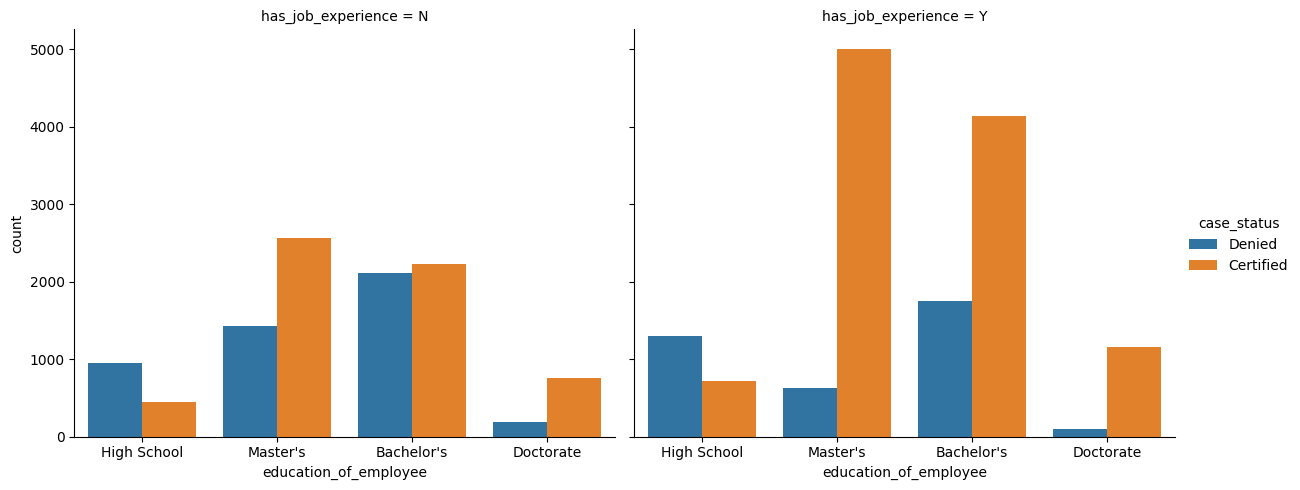

In [39]:
sns.catplot(x="education_of_employee",hue="case_status",col="has_job_experience",data=df,kind="count",height=5,aspect=1.2)
plt.show()

In [40]:

# Now split into X and y
X = df.drop('case_status', axis=1)
y = df['case_status']

# ...existing code...

In [41]:
num_feature=[feature for feature in df.columns if df[feature].dtype!='O' ]
len(num_feature)

3

KeyError: 'company_age'

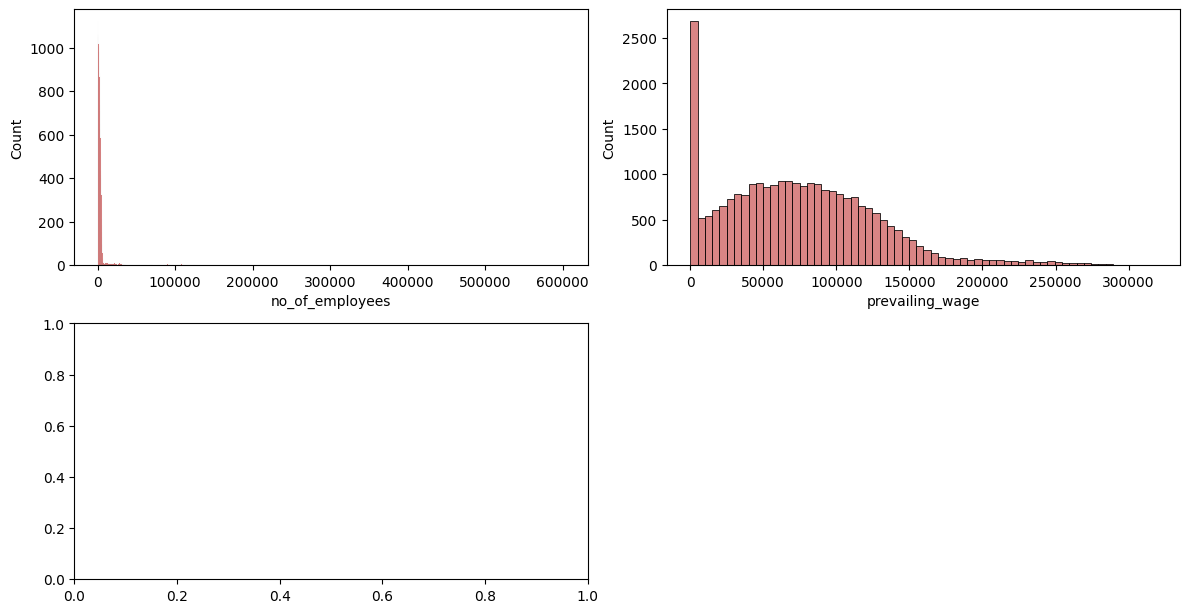

In [42]:
# distribution of data before scaling
plt.figure(figsize=(12, 6))
for i, col in enumerate(['no_of_employees','prevailing_wage','company_age']):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=X[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [ ]:
df[num_feature].head()

,no_of_employees,prevailing_wage,company_age
0,14513,592.2029,18
1,2412,83425.6500,23
2,44444,122996.8600,17
3,98,83434.0300,128
4,1082,149907.3900,20


In [ ]:
X[num_feature].skew(axis=0,skipna=True)

no_of_employees    12.265260
prevailing_wage     0.755776
company_age         2.037301
dtype: float64

- Positiviely Skewed : company_age, no_of_employees.
- We can handle outliers and then check the skewness.

## Apply Power Transformer to Check if it can reduces the outliers

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
transform_features =['company_age', 'no_of_employees']
X_copy=pt.fit_transform(X[transform_features])

In [ ]:
X_copy = pd.DataFrame(X_copy, columns=transform_features)

In [ ]:
X_copy.head()

,company_age,no_of_employees
0,-0.955551,1.517300
1,-0.467001,0.030912
2,-1.078363,2.885076
3,1.630914,-1.343550
4,-0.738126,-0.432287


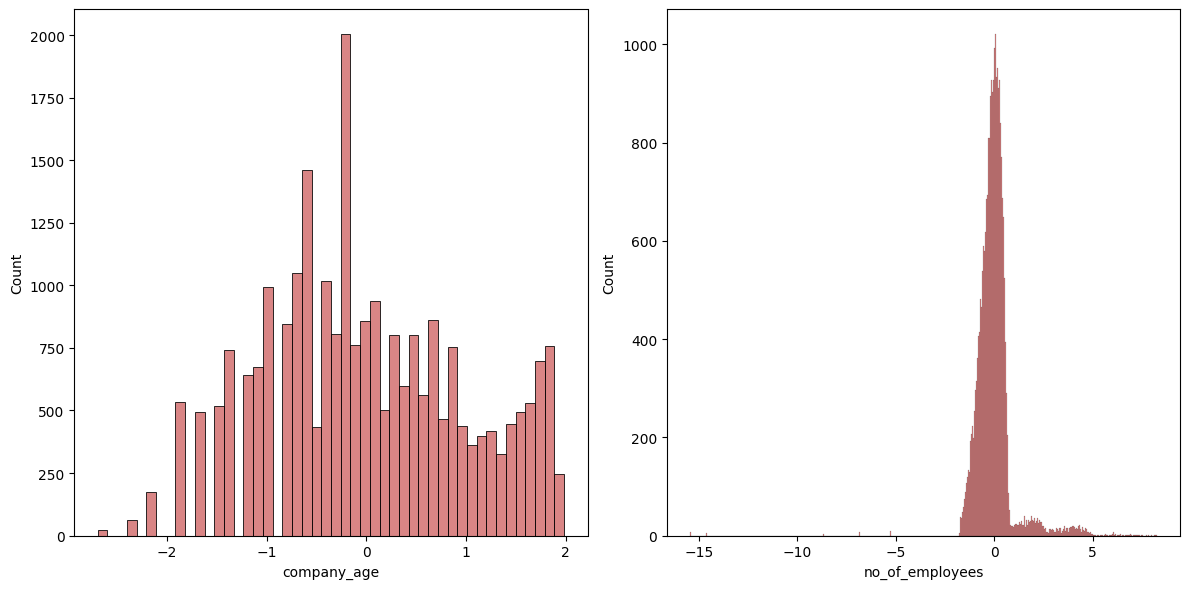

In [ ]:
plt.figure(figsize=(12,6))
for i, col in enumerate(transform_features):
    plt.subplot(1,2,i+1)
    sns.histplot(x=X_copy[col],color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

**Checking Skewness**

In [ ]:
X_copy.skew()

company_age        0.112260
no_of_employees    0.399339
dtype: float64

- Here Yeo-Johnson is used and it supports both positive or negative data for transformation.
- So Power Transformer with yeo-johnson can be used.

 **One Hot Encoding for Columns which had lesser unique values and not ordinal**
* One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

**Ordinal Encoding for Columns which has many unique categories**
* Ordinal encoding is used here as label encoder is supported for column transformer.
* Ordinal encoding is used for Ordinal Variable. Variable comprises a finite set of discrete values with a ranked ordering between values.

**Standard Scaler**
* Standardize features by removing the mean and scaling to unit variance.

**Power Transformer**
* Power transforms are a technique for transforming numerical input or output variables to have a Gaussian or more-Gaussian-like probability distribution.

**Selecting numerical features for preprocessing**

In [ ]:
num_feature =list(X.select_dtypes(exclude='object').columns)

In [ ]:
num_feature

['no_of_employees', 'prevailing_wage', 'company_age']

**Preprocessing using column transformer**

In [ ]:
or_columns = ['has_job_experience','requires_job_training','full_time_position','education_of_employee']
oh_columns = ['continent','unit_of_wage','region_of_employment']
transform_columns= ['no_of_employees','company_age']

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
numeric_transformer  = StandardScaler()
oh_transformer = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()

transform_pipe = Pipeline(steps=[
    ('transformer', PowerTransformer(method='yeo-johnson'))
  ])

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, oh_columns),
        ("Ordinal_Encoder", ordinal_encoder, or_columns),
        ("Transformer", transform_pipe, transform_columns),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [ ]:
X = preprocessor.fit_transform(X)
X